In [52]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
tweet_data = pd.read_csv("/Users/caoshengyuan/Desktop/AML final project/data/Tweet.csv",
                               on_bad_lines='skip')

# from github Tweets about the Top Companies from 2015 to 2020
# https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Tweet.csv

In [49]:
tweet_data.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [50]:
len(tweet_data)

3717964

In [51]:
tweet_data.tweet_id.nunique() # all rows are unique 

3717964

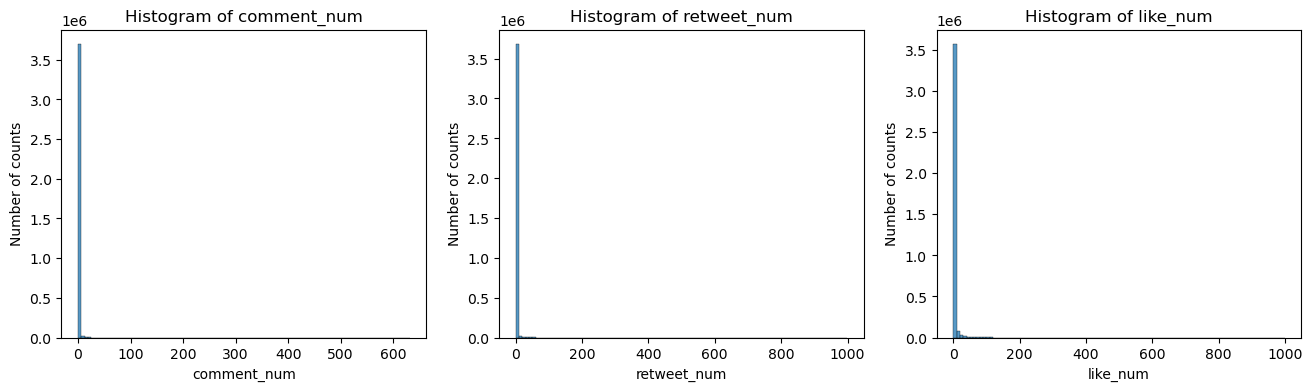

In [73]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
sns.histplot(tweet_data.comment_num,bins = 100, ax=ax[0]);
ax[0].set_xlabel('comment_num');
ax[0].set_ylabel('Number of counts');
ax[0].set_title('Histogram of comment_num');

sns.histplot(tweet_data.retweet_num,bins=100, ax=ax[1]);
ax[1].set_xlabel('retweet_num');
ax[1].set_ylabel('Number of counts');
ax[1].set_title('Histogram of retweet_num');

sns.histplot(tweet_data.like_num,bins = 100, ax=ax[2]);
ax[2].set_xlabel('like_num');
ax[2].set_ylabel('Number of counts');
ax[2].set_title('Histogram of like_num');


In [61]:
tweet_data[['comment_num','retweet_num','like_num']].describe()

,comment_num,retweet_num,like_num
count,3.717964e+06,3.717964e+06,3.717964e+06
mean,3.123642e-01,6.214807e-01,2.219982e+00
std,1.966064e+00,7.009571e+00,1.429093e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.000000e+00
max,6.310000e+02,9.990000e+02,9.990000e+02


In [62]:
tweet_data[['comment_num','retweet_num','like_num']].corr()

,comment_num,retweet_num,like_num
comment_num,1.000000,0.362836,0.567386
retweet_num,0.362836,1.000000,0.417846
like_num,0.567386,0.417846,1.000000


In [63]:
Company_Tweet_data= pd.read_csv("/Users/caoshengyuan/Desktop/AML final project/data/Company_Tweet.csv",
                               on_bad_lines='skip')

# also from https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020?select=Tweet.csv

In [66]:
Company_Tweet_data.head(10)

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
5,550802745737768960,AAPL
6,550797494188142592,AAPL
7,550797275786518528,AAPL
8,550797272686923776,AAPL
9,550796617444765696,AAPL


In [67]:
Company_name_projection = pd.read_csv("/Users/caoshengyuan/Desktop/AML final project/data/Company.csv",
                               on_bad_lines='skip')
# Values of Top NASDAQ Companies from 2010 to 2020
# https://www.kaggle.com/datasets/omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020

In [68]:
Company_name_projection

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [39]:
company_value_data = pd.read_csv("/Users/caoshengyuan/Desktop/AML final project/data/CompanyValues.csv",
                               on_bad_lines='skip')

# from github https://www.kaggle.com/datasets/omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020

In [70]:
company_value_data.head(10)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.6300
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.0900
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.5000
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.3500
5,AAPL,2020-05-21,316.85,25672210,318.66,320.89,315.8700
6,AAPL,2020-05-20,319.23,27876220,316.68,319.52,316.2000
7,AAPL,2020-05-19,313.14,25432390,315.03,318.52,313.0100
8,AAPL,2020-05-18,314.96,33843130,313.17,316.50,310.3241
9,AAPL,2020-05-15,307.71,41587090,300.35,307.90,300.2100


In [71]:
company_value_data.ticker_symbol.value_counts()

AAPL     3085
AMZN     3085
GOOGL    3085
MSFT     3085
TSLA     3065
GOOG     2123
Name: ticker_symbol, dtype: int64

<AxesSubplot:xlabel='day_date', ylabel='close_value'>

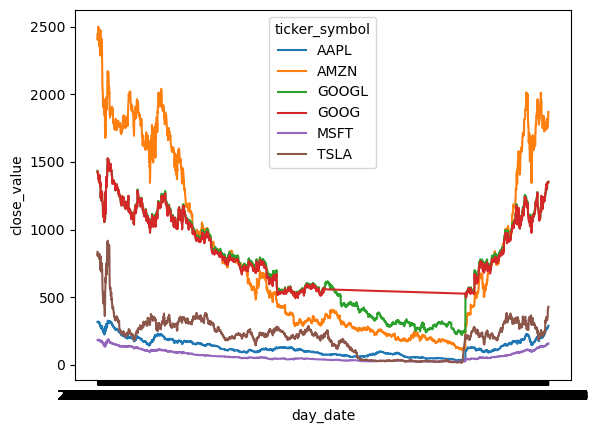

In [75]:
# Stock price for top 5 companies 
sns.lineplot(data=company_value_data, x="day_date", y="close_value",hue='ticker_symbol')

<AxesSubplot:xlabel='day_date', ylabel='close_value'>

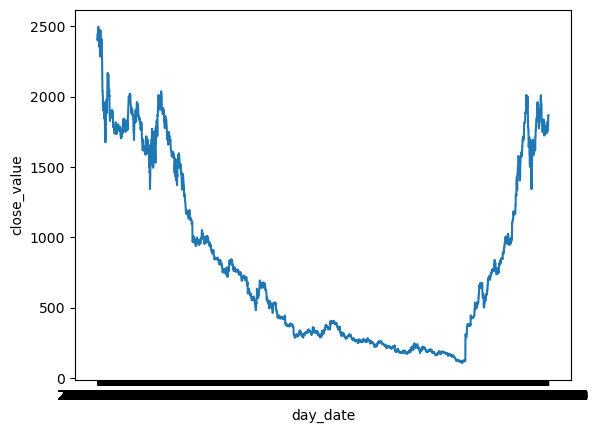

In [77]:
# amazon only
sns.lineplot(data=company_value_data[company_value_data.ticker_symbol=='AMZN'], x="day_date", y="close_value")